In [1]:
import numpy as np
import matplotlib.pyplot as plt

import data.data as data
import data.acf as acf
import error.error as error
import reservoir.reservoir as res

In [2]:
LORENZ_LYAPUNOV = 0.91
DEL_T = 0.02
STEPS = 4000
WASHOUT = 3500

In [3]:
seeds = range(1, 1000)
initial_states = [
    list(np.random.RandomState(seed).uniform(-5, 5, 3))
    for seed in seeds
]
initial_states

[[-0.8297799529742598, 2.2032449344215808, -4.998856251826551],
 [-0.6400509785799624, -4.740737681721087, 0.49662477878709144],
 [0.5079790257457546, 2.081478226181048, -2.0909526108705565],
 [4.670298390136766, 0.4723224917572235, 4.726843599648843],
 [-2.780068289102605, 3.7073230617737636, -2.932808446605736],
 [3.9286015143600164, -1.6802019469882277, 3.212291230578318],
 [-4.236917106260428, 2.7991879224011464, -0.6159076855910648],
 [3.7342940279181622, 4.68540662820932, 3.691945402139199],
 [-4.896258461143001, 0.01874592148738774, -0.04226706865853913],
 [2.7132064326674596, -4.792480506405985, 1.336482349262754],
 [-3.197303111232308, -4.805247585123754, -0.3678147350165535],
 [-3.4583715762032763, 2.4004969651540478, -2.3668498481486533],
 [2.7770241057382012, -2.624587799650877, 3.242785326613685],
 [0.1394334377269022, 2.731650520792968, 3.704276857248127],
 [3.488176972685787, -3.211040750790015, -4.456367856935685],
 [-2.7670892084646113, 0.23163341400676085, 0.507014565

In [4]:
u_all = []
i = 0
for u_0 in initial_states:
    u_all.append(data.generate_lorenz_63(initial_state=u_0, del_t=DEL_T, steps=STEPS, washout=WASHOUT))
    print(i)
    i += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [5]:
time_all = []
acfs_all = []
preds_all = []
rmse_all = []

i = 0
while i < len(u_all):
    u = u_all[i]
    seed = seeds[i]

    T = u.shape[0]
    time = np.arange(T) * DEL_T * LORENZ_LYAPUNOV
    acfs = acf.compute_acfs(u, "x", "x")
    W_out, r, A, W_in = res.train_p(u, rho=0.6, s_in=1, R=500, beta=10e-4, seed=seed)
    preds = res.predict(u[0], W_out, T, A, W_in)

    time_all.append(time)
    acfs_all.append(acfs)
    preds_all.append(preds)
    rmse_all.append(error.RMSE(u, preds))

    print("{} / {} done".format(i+1, len(u_all)))
    i += 1

/Users/leoli/Desktop/uni/Honours/thesis-code/reservoir/reservoir.py:89: ComplexWarning: Casting complex values to real discards the imaginary part
  r[t] = next_res(
/Users/leoli/Desktop/uni/Honours/thesis-code/reservoir/reservoir.py:152: ComplexWarning: Casting complex values to real discards the imaginary part
  u_hat[t] = W_out(curr_res, p)


1 / 999 done
2 / 999 done
3 / 999 done
4 / 999 done
5 / 999 done
6 / 999 done
7 / 999 done
8 / 999 done
9 / 999 done
10 / 999 done
11 / 999 done
12 / 999 done
13 / 999 done
14 / 999 done
15 / 999 done
16 / 999 done
17 / 999 done
18 / 999 done
19 / 999 done
20 / 999 done
21 / 999 done
22 / 999 done
23 / 999 done
24 / 999 done
25 / 999 done
26 / 999 done
27 / 999 done
28 / 999 done
29 / 999 done
30 / 999 done
31 / 999 done
32 / 999 done
33 / 999 done
34 / 999 done
35 / 999 done
36 / 999 done
37 / 999 done
38 / 999 done
39 / 999 done
40 / 999 done
41 / 999 done
42 / 999 done
43 / 999 done
44 / 999 done
45 / 999 done
46 / 999 done
47 / 999 done
48 / 999 done
49 / 999 done
50 / 999 done
51 / 999 done
52 / 999 done
53 / 999 done
54 / 999 done
55 / 999 done
56 / 999 done
57 / 999 done
58 / 999 done
59 / 999 done
60 / 999 done
61 / 999 done
62 / 999 done
63 / 999 done
64 / 999 done
65 / 999 done
66 / 999 done
67 / 999 done
68 / 999 done
69 / 999 done
70 / 999 done
71 / 999 done
72 / 999 done
7

In [6]:
rmse_all = np.array(rmse_all)

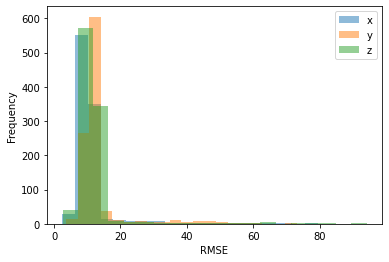

In [7]:
plt.figure(facecolor="white")
plt.hist(rmse_all[:, 0], bins=20, alpha=0.5, label="x")
plt.hist(rmse_all[:, 1], bins=20, alpha=0.5, label="y")
plt.hist(rmse_all[:, 2], bins=20, alpha=0.5, label="z")

plt.xlabel("RMSE")
plt.ylabel("Frequency")

plt.legend()

In [8]:
print(np.mean(rmse_all[:, 0]))
print(np.mean(rmse_all[:, 1]))
print(np.mean(rmse_all[:, 2]))

11.020500980145307
13.22264013364272
12.423854439498859


In [9]:
print(np.var(rmse_all[:, 0]))
print(np.var(rmse_all[:, 1]))
print(np.var(rmse_all[:, 2]))

46.97879173656051
59.571648263047855
74.05622704040906


In [10]:
ROESSLER_LYAPUNOV = 1
DEL_T = 0.01
STEPS = 10000
WASHOUT = 3000

In [11]:
seeds = range(1, 1000)
initial_states = [
    list(np.random.RandomState(seed).uniform(-5, 5, 3))
    for seed in seeds
]
initial_states

[[-0.8297799529742598, 2.2032449344215808, -4.998856251826551],
 [-0.6400509785799624, -4.740737681721087, 0.49662477878709144],
 [0.5079790257457546, 2.081478226181048, -2.0909526108705565],
 [4.670298390136766, 0.4723224917572235, 4.726843599648843],
 [-2.780068289102605, 3.7073230617737636, -2.932808446605736],
 [3.9286015143600164, -1.6802019469882277, 3.212291230578318],
 [-4.236917106260428, 2.7991879224011464, -0.6159076855910648],
 [3.7342940279181622, 4.68540662820932, 3.691945402139199],
 [-4.896258461143001, 0.01874592148738774, -0.04226706865853913],
 [2.7132064326674596, -4.792480506405985, 1.336482349262754],
 [-3.197303111232308, -4.805247585123754, -0.3678147350165535],
 [-3.4583715762032763, 2.4004969651540478, -2.3668498481486533],
 [2.7770241057382012, -2.624587799650877, 3.242785326613685],
 [0.1394334377269022, 2.731650520792968, 3.704276857248127],
 [3.488176972685787, -3.211040750790015, -4.456367856935685],
 [-2.7670892084646113, 0.23163341400676085, 0.507014565

In [12]:
u_all = []
for u_0 in initial_states:
    u_all.append(data.generate_roessler(initial_state=u_0, del_t=DEL_T, steps=STEPS, washout=WASHOUT))

In [13]:
time_all = []
acfs_all = []
preds_all = []
rmse_all = []

i = 0
while i < len(u_all):
    u = u_all[i]
    seed = seeds[i]

    T = u.shape[0]
    time = np.arange(T) * DEL_T * ROESSLER_LYAPUNOV
    acfs = acf.compute_acfs(u, "x", "x")
    W_out, r, A, W_in = res.train_p(u, rho=0.1, s_in=1, R=500, beta=10e-4, seed=seed)
    preds = res.predict(u[0], W_out, T, A, W_in)

    time_all.append(time)
    acfs_all.append(acfs)
    preds_all.append(preds)
    rmse_all.append(error.RMSE(u, preds))

    print("{} / {} done".format(i+1, len(u_all)))
    i += 1

1 / 999 done
2 / 999 done
3 / 999 done
4 / 999 done
5 / 999 done
6 / 999 done
7 / 999 done
8 / 999 done
9 / 999 done
10 / 999 done
11 / 999 done
12 / 999 done
13 / 999 done
14 / 999 done
15 / 999 done
16 / 999 done
17 / 999 done
18 / 999 done
19 / 999 done
20 / 999 done
21 / 999 done
22 / 999 done
23 / 999 done
24 / 999 done
25 / 999 done
26 / 999 done
27 / 999 done
28 / 999 done
29 / 999 done
30 / 999 done
31 / 999 done
32 / 999 done
33 / 999 done
34 / 999 done
35 / 999 done
36 / 999 done
37 / 999 done
38 / 999 done
39 / 999 done
40 / 999 done
41 / 999 done
42 / 999 done
43 / 999 done
44 / 999 done
45 / 999 done
46 / 999 done
47 / 999 done
48 / 999 done
49 / 999 done
50 / 999 done
51 / 999 done
52 / 999 done
53 / 999 done
54 / 999 done
55 / 999 done
56 / 999 done
57 / 999 done
58 / 999 done
59 / 999 done
60 / 999 done
61 / 999 done
62 / 999 done
63 / 999 done
64 / 999 done
65 / 999 done
66 / 999 done
67 / 999 done
68 / 999 done
69 / 999 done
70 / 999 done
71 / 999 done
72 / 999 done
7

In [14]:
rmse_all = np.array(rmse_all)

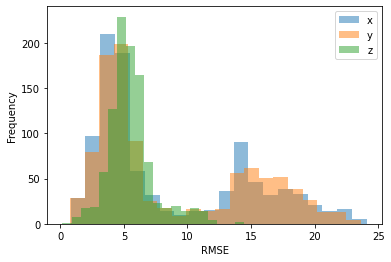

In [15]:
plt.figure(facecolor="white")
plt.hist(rmse_all[:, 0], bins=20, alpha=0.5, label="x")
plt.hist(rmse_all[:, 1], bins=20, alpha=0.5, label="y")
plt.hist(rmse_all[:, 2], bins=20, alpha=0.5, label="z")

plt.xlabel("RMSE")
plt.ylabel("Frequency")

plt.legend()

In [16]:
print(np.mean(rmse_all[:, 0]))
print(np.mean(rmse_all[:, 1]))
print(np.mean(rmse_all[:, 2]))

8.617360845358771
8.667061895185444
5.560179804583964


In [17]:
print(np.var(rmse_all[:, 0]))
print(np.var(rmse_all[:, 1]))
print(np.var(rmse_all[:, 2]))

36.75849823437852
36.26652297636262
3.335697985894812
